<a href="https://colab.research.google.com/github/Keerthana-singupuram/Spotify---Top-100-Streamed-Songs/blob/main/Spotify_Top_100_Streamed_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPOTIFY :**


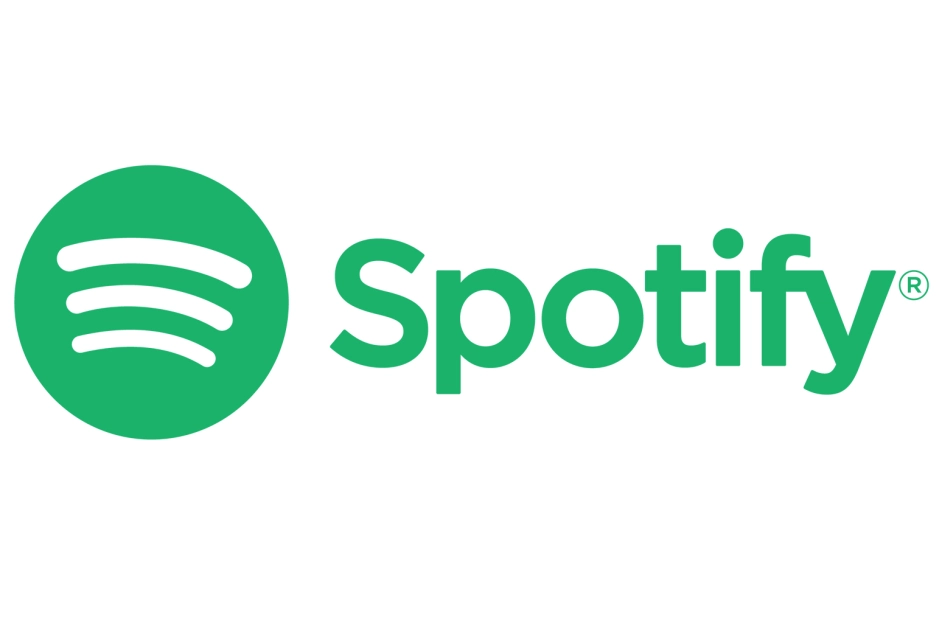

### The data is all about top 100 songs that are most streamed songs with all their features extracted from the Spotify API.

### There are multiple rows with various factors such as: 

### **ID** : Unique ID given to each song on spotify.

### **Name** : Name of the song.

### **Duration** : Duration of the song in minutes.

### **Energy** : A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

### **Key** : The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

###**Loudness** : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track.

###**Mode** : Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.Major is represented by 1 and minor is 0.

###**Speechiness** : Detects the presence of spoken words in a track.

###**Acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic where 1.0 represents high confidence.

###**Instrumentalness** : Predicts whether a track contains no vocals.Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

### The whole data extracted is from the Spotify API and the following data is of the year 2021.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data1=pd.read_csv('/content/Top 100 streamed songs - Spotify.csv')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                100 non-null    object 
 1   Name              100 non-null    object 
 2   Duration          100 non-null    float64
 3   Energy            100 non-null    float64
 4   Key               100 non-null    int64  
 5   Loudness          100 non-null    float64
 6   Mode              100 non-null    int64  
 7   Speechiness       100 non-null    float64
 8   Acousticness      100 non-null    float64
 9   Instrumentalness  100 non-null    float64
 10  Liveness          100 non-null    float64
 11  Valence           100 non-null    float64
 12  Tempo             100 non-null    float64
 13  Danceability      100 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.1+ KB


In [5]:
data1.isnull().any()

ID                  False
Name                False
Duration            False
Energy              False
Key                 False
Loudness            False
Mode                False
Speechiness         False
Acousticness        False
Instrumentalness    False
Liveness            False
Valence             False
Tempo               False
Danceability        False
dtype: bool

In [49]:
data1.describe()

,Duration,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Danceability
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.404900,0.587650,5.05000,-6.577120,0.560000,0.075461,0.314539,0.070682,0.161737,0.517354,121.548260,0.647900
std,0.927022,0.168273,3.82542,2.447338,0.498888,0.068065,0.281076,0.221947,0.112657,0.237512,29.148613,0.126942
min,0.730000,0.157000,0.00000,-14.067000,0.000000,0.025300,0.000280,0.000000,0.034100,0.059200,71.884000,0.352000
25%,2.910000,0.477750,1.00000,-7.676250,0.000000,0.036100,0.090750,0.000000,0.088375,0.329000,97.476250,0.566750
50%,3.370000,0.609000,5.00000,-6.262500,1.000000,0.051800,0.238500,0.000000,0.120000,0.542000,117.037500,0.663500
75%,3.630000,0.707750,8.00000,-4.786750,1.000000,0.080650,0.519750,0.000083,0.205250,0.711500,141.733750,0.734000
max,10.220000,0.883000,11.00000,-2.724000,1.000000,0.368000,0.941000,0.941000,0.509000,0.967000,180.917000,0.910000


In [7]:
data1.nunique()

ID                  86
Name                90
Duration            63
Energy              80
Key                 12
Loudness            86
Mode                 2
Speechiness         83
Acousticness        83
Instrumentalness    41
Liveness            78
Valence             82
Tempo               85
Danceability        83
dtype: int64

In [48]:
data1.head()

,Name,Duration,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Danceability
0,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


In [51]:
data1.shape

(100, 13)

In [52]:
data1.isnull().sum()

Name                0
Duration            0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Danceability        0
dtype: int64

In [9]:
data1.drop(['ID'], axis=1, inplace=True)

In [47]:
data1.head()

,Name,Duration,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Danceability
0,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


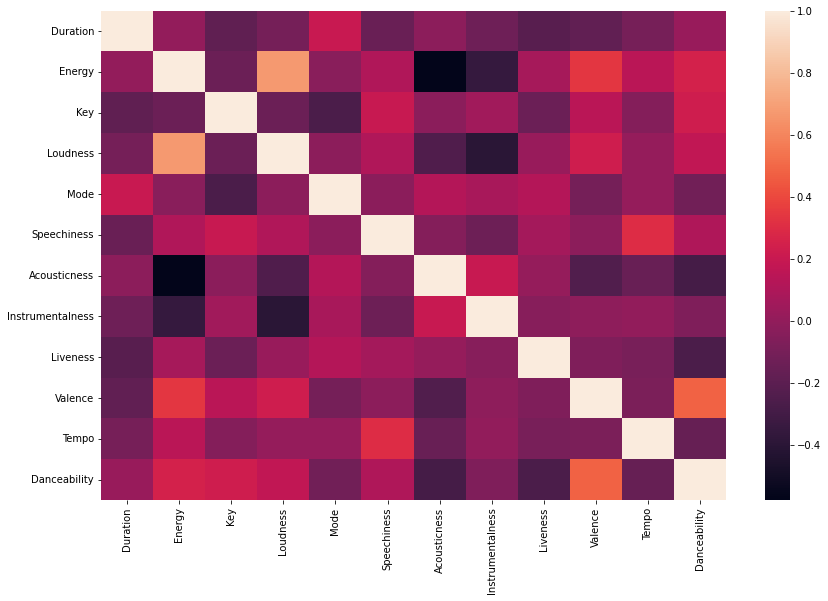

In [35]:
correlation_matrix = data1.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix)
plt.show()

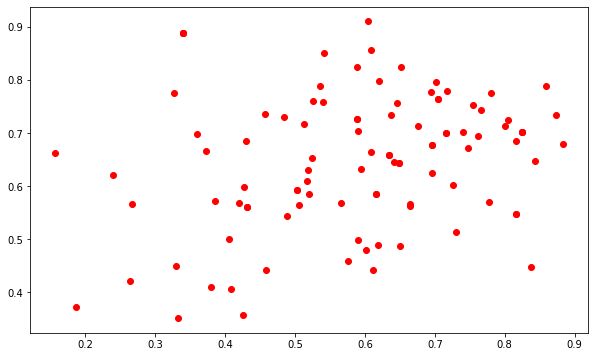

In [27]:
energy = data1['Energy']
danceability = data1['Danceability']
c=['red']
plt.scatter(energy, danceability, c=c)
plt.show()
plt.rcParams['figure.figsize']=(10,6)

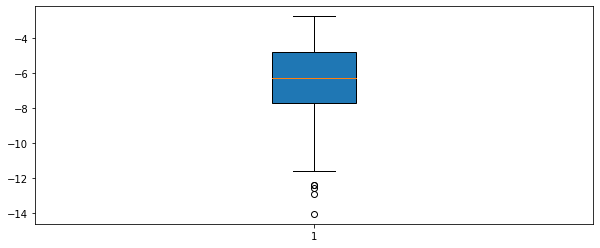

In [46]:
loudness = data1['Loudness']
plt.boxplot(loudness, vert= True, patch_artist='green')
plt.rcParams['figure.figsize']=(10,10)

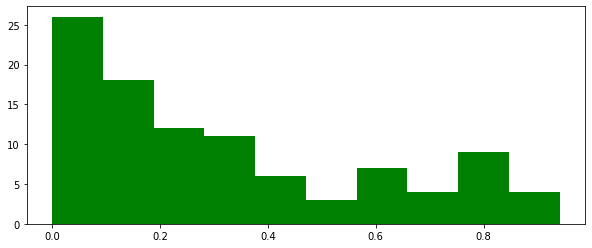

In [61]:
acoust = data1['Acousticness']
plt.hist(acoust,color='green')
plt.rcParams['figure.figsize']=(8,4)

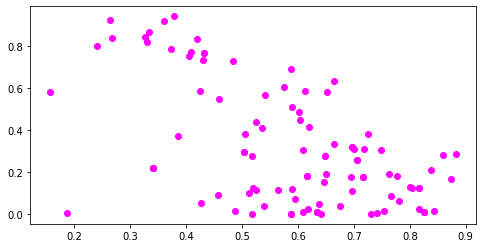

In [63]:
energy = data1['Energy']
danceability = data1['Acousticness']
c=['magenta']
plt.scatter(energy, danceability, c=c)
plt.show()
plt.rcParams['figure.figsize']=(10,6)

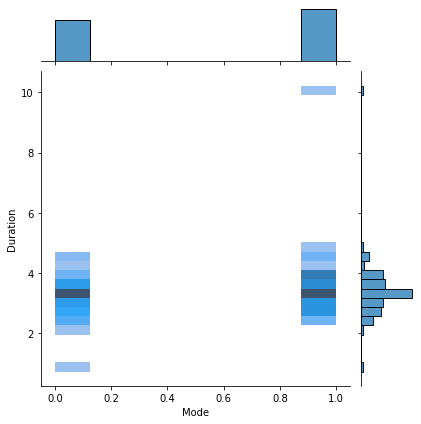

In [59]:
sns.jointplot(x=data1['Mode'],y=data1['Duration'],data=data1,kind='hist')
plt.rcParams['figure.figsize']=(20,20)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


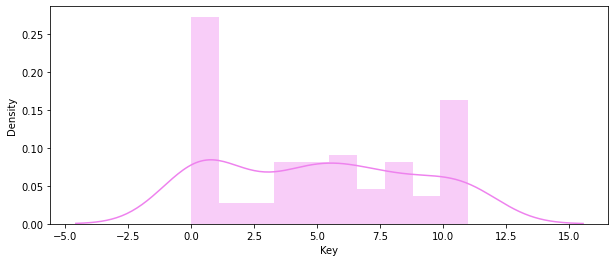

In [55]:
sns.distplot(data1['Key'],kde=True,bins=10,color='violet')
plt.rcParams['figure.figsize']=(10,8)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


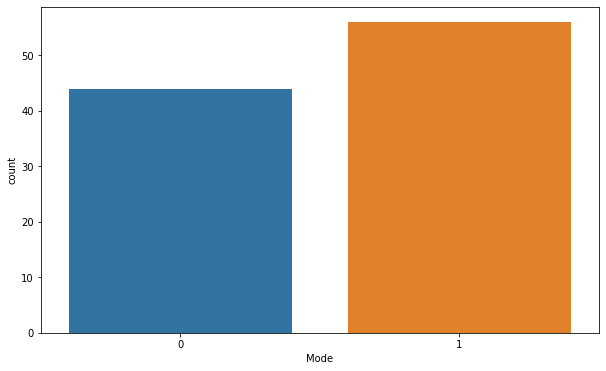

In [30]:
sns.countplot(data1['Mode'])
plt.rcParams['figure.figsize']=(10,6)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


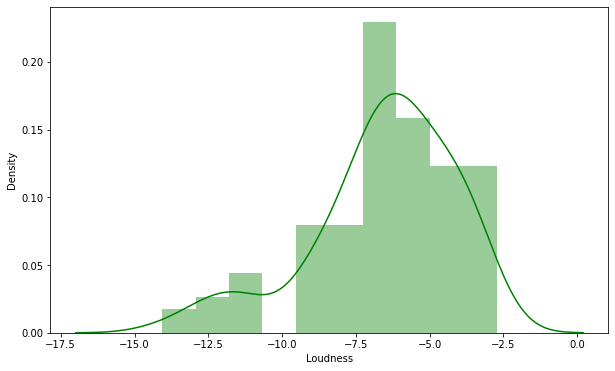

In [43]:
sns.distplot(data1['Loudness'],color='green')
plt.rcParams['figure.figsize']=(10,8)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


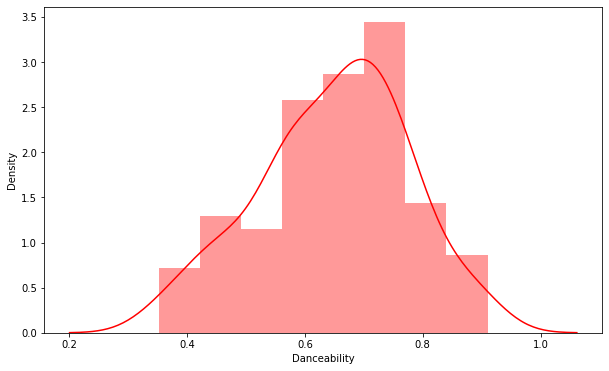

In [40]:
sns.distplot(data1['Danceability'],color='red')
plt.rcParams['figure.figsize']=(10,4)